# **Trabalho \#1**: Reinforcement Learning MO436A/MC935A
Universidade Estadual de Campinas (UNICAMP), Instituto de Computação (IC)

Profa. Esther Luna Colombini, 2020s2

### - RA: 230640 - Diego Alysson Braga Moreira
### - RA: 265671 - Leonardo Henrique Neumann
### - RA: 264958 - Levy Gurgel Chaves
### - RA: 172519 - Luara Peres Oliveira da Silva
### - RA: 264339 - Matteo Di Fabio

# 1 - Problema

O *N-Puzzle* é um quebra-cabeças composto por um tabuleiro contendo N peças deslizantes marcadas com números, letras ou figuras e um único espaço vazio. O objetivo é deslizar as peças do tabuleiro no sentido horizontal ou vertical sobre o espaço vazio até que todas as peças estejam devidamente ordenadas da esquerda para a direita, de cima para baixo. É comum encontrar as variantes nos tamanhos 3x3 (*8-puzzle*) e 4x4 (*15-puzzle*), no entanto é possível ter tabuleiros de quaisquer tamanhos maiores que 2x2. A figura abaixo mostra uma possível sequência de movimentos para resolver um tabuleiro 3x3 partindo de uma posição inicial à esquerda até a posição final à direita:

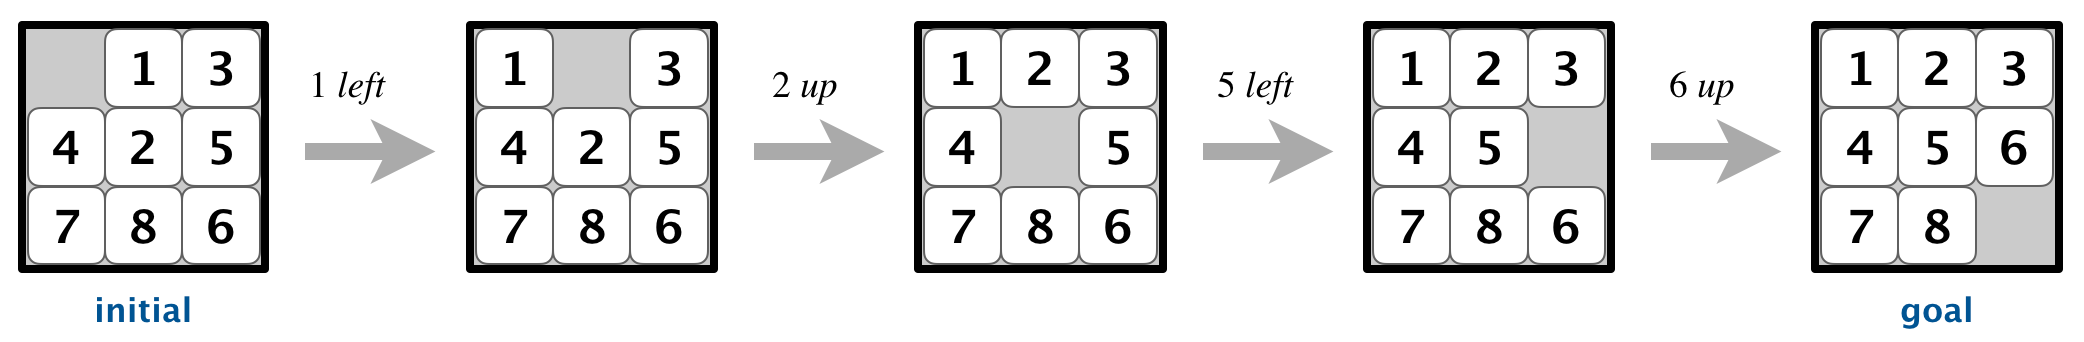

## Modelagem do Problema

### Estados

O estado do tabuleiro para um quebra-cabeças *N-Puzzle* pode ser representado por um arranjo de *N+1* inteiros correspondentes aos números das peças e em especial o zero que representa o espaço vazio. As peças são dispostas no arranjo na ordem em que aparecem no tabuleiro quando lido da esquerda para a direita, de cima para baixo, como visto na figura abaixo:
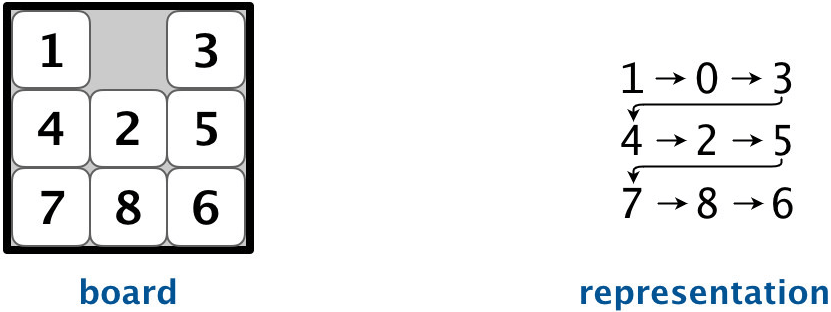

Para o problema do N-Puzzle, um dado estado é dito como terminal, quando todas as suas peças estão em suas corretas posições, ou seja, para um dado tabuleiro n x m, tem-se n\*m peças, formando uma sequencia dada por 1, 2, 3 .... (n*m)-1, 0.

### Ações

Existem de duas a quatro ações disponíveis a partir de um determinado estado, que são correspondentes as possibilidades de movimento das peças adjacentes sobre o espaço vazio do tabuleiro nas direções norte, sul, leste e oeste, como representado abaixo:

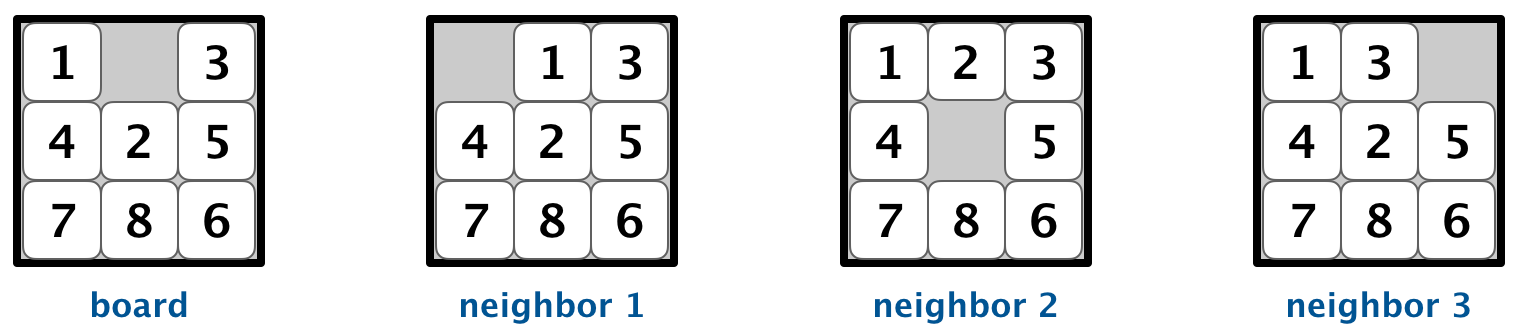

Para fins de simplificação do modelo, adotou-se que o agente pode realizar movimentos em direções inválidas, que resultam em uma maior penalidade e não alteram o estado atual.

### Função Valor

Para avaliar o quão distante em número de movimentos um determinado estado está do estado final, utilizamos a função **Distância de Manhattan**, que consiste em calcular o somatório da distância vertical e horizontal de cada peça até a sua posição de destino na configuração do estado final do tabuleiro, dessa forma, para o estado final a distância total é zero.

### Função Recompensa

Diferentes configurações de recompensas foram observadas, porém mantém-se como principais configurações as pontuações de -1 por movimentação, para incentivar uma quantidade menor de movimentos, -5 pontos por movimentações incorretas, que saem do tabuleiro do jogo, incentivando o agente a não realizar este tipo de movimento para ações inválidas e 1000 pontos por vitória.

### Natureza do Problema

O problema adotado neste trabalho é por natureza determinístico, não-episódico e discreto, não sendo necessário dessa forma um modelo de discretização.

### Parâmetros Adicionais

Os parâmetros adicionais adotados na modelagem do problema estão descritos abaixo:
- terminal_state_reward = 1000 
- invalid_position_reward = -5
- step_reward = -1
- discount_factor = 0.95
- N0 = 55
- lamda_factor= 0.7
- eligibility_decay=0.90
- step_size=0.5
- number_of_episodes = 1000
- number_of_steps = 1000

### Formulação como Problema Decisório de Markov

Sumarizando a modelagem descrita anteriormente, temos a seguinte formulação MDP:

**MDP(S, A, P, R, γ):**
- **S (Estados):** O estado S representa a configuração das posições das peças no tabuleiro, lidas da esquerda para a direita, de cima para baixo;
- **A (Ações):** Para cada estado tem-se a opção de quatro diferentes ações, movimentar o espaço vazio para o norte, leste, sul e oeste;
- **P (Probabilidade):** O ambiente utilizado é deterministico, desta forma, cada ação disponivel tem 0.25% de chance de ser escolhido para cada estado;
- **R (Recompensa):** Diferentes configurações de recompensas foram observadas, porém mantém-se como principais configurações as pontuações de -1 por movimentação,
para incentivar uma quantidade menor de movimentos, -5 pontos por movimentações incorretas, que saem do tabuleiro do jogo, incentivando o agente a não realizar este tipo de movimento para ações inválidas e 1000 pontos por vitória;
- **γ (Fator de Desconto):** Multiplos valores também foram testados para o fator de desconto, porém para os exemplos abaixos verificados, utilizou-se um γ de 0.95; 

## Avaliação do Problema

### Solucionabilidade

O espaço de estados pode ser classificado da seguinte forma:

* Estados que podem atingir o estado final em um número finito de movimentos;
* Estados que só podem atingir o estado final dado a troca de duas peças de lugar;

Portanto, não é para todo estado inicial que se pode encontrar uma solução, sendo solucionáveis apenas *50%* dos estados iniciais. Abaixo temos exemplos de estados iniciais que não podem ser resolvidos:

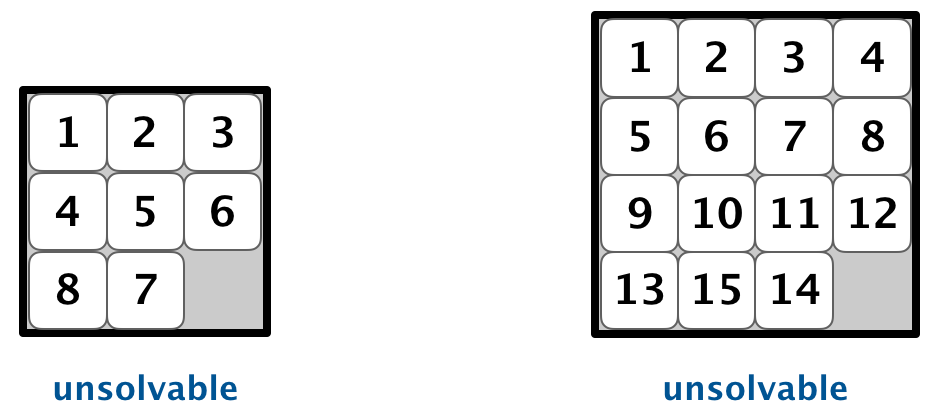

Neste trabalho iremos nos limitar aos estados iniciais que podem ser resolvidos, e para gerar esses estados serão utilizados movimentos aleatórios à partir do estado final, que garantidamente podem atingir o estado final considerando a possibilidade de se tomar o caminho reverso; Essa abordagem também permite estabelecer um patamar de dificuldade de acordo com a quantidade de movimentos aleatórios tomados para embaralhar o quebra-cabeças.

### Complexidade

O problema de descobrir se um dado estado inicial é solucionável está na classe de complexidade **P**, enquanto que o problema de determinar o menor número de movimentos necessários para resolver o quebra-cabeça a partir de um estado inicial está na classe de complexidade **NP-Difícil**. Também é **NP-difícil** aproximar o menor número de movimentos dentro de uma constante aditiva, mas há uma aproximação de fator constante de tempo polinomial.


# 2 - Métodos de Controle

## Implementação do Ambiente

### Ambiente

In [1]:
import enum
import math
import operator
import random
import time
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.table import Table
import os
from copy import deepcopy
np.random.seed(42)


class Direction(enum.Enum):
    """
        Direction class for handling 
    """
    NORTH = (0, -1)
    SOUTH = (0, 1)
    WEST = (-1, 0)
    EAST = (1, 0)

    def id(self):
        """"
            return one Direction ID: 
            0 - NORTH
            1 = SOUTH 
            2 - WEST
            3 - EAST
        """
        dict_ids = {d[0]: i for (i, d) in enumerate(Direction.__members__.items())}
        return dict_ids[self.name]

    def increment(self, position):
        """
            Sum values from into the direction values
        """
        return tuple(map(operator.add, position, self.value))

    def opposite(self):
        """
            Return the opposite direction of the current one
        """
        return Direction(tuple(map(operator.mul, self.value, (-1, -1))))


class NPuzzle:
    def __init__(self, width, height, terminal_state_reward=1000,
                 step_reward=-1, invalid_position_reward=-30):
        '''
        Initialize an N-Puzzle grid with every tile at the goal position.

        Arguments:
            width (int): Grid width
            height (int): Grid height
        '''

        assert 1 < width, 'Invalid width'
        assert 1 < height, 'Invalid height'

        size = width * height
        self.tiles = list(range(1, size + 1))
        self.tiles[size - 1] = 0
        self.width = width
        self.height = height
        self.loss = 0
        self.terminal_state_reward = terminal_state_reward
        self.step_reward = step_reward
        self.invalid_position_reward = invalid_position_reward

    def __str__(self):
        '''
        Represents an N-Puzzle grid as a multiline string.

        Returns:
            puzzle (str): N-Puzzle represented as string
        '''

        puzzle = ''
        length = int(math.log10(self.width * self.height - 1)) + 1

        for y in range(self.height):
            puzzle += '\n '
            for x in range(self.width):
                value = self.tiles[x + y * self.width]
                tile = str(value).zfill(length) if value > 0 else length * ' '
                puzzle += ' ' + tile + ' '
            puzzle += ' \n'

        return puzzle

    def locate(self, tile):
        '''
        Locates a given tile and returns its position.

        Arguments:
            tile (int): Tile number

        Returns:
            position (int, int): Tile coordinates
        '''

        index = self.tiles.index(tile)
        return (index % self.width, index // self.width)

    def tile_distance(self, position):
        '''
        Calculates the manhattan distance of a tile to its goal position.

        Arguments:
            position (int, int): Tile coordinates

        Returns:
            dist (int): Manhattan distance to goal position
        '''

        assert 0 <= position[0] < self.width, 'Invalid X coordinate'
        assert 0 <= position[1] < self.height, 'Invalid Y coordinate'

        position_index = position[0] + position[1] * self.width
        origin_index = (self.tiles[position_index] - 1) % len(self.tiles)
        origin = (origin_index % self.width, origin_index // self.width)
        return abs(position[0] - origin[0]) + abs(position[1] - origin[1])

    def move(self, direction):
        '''
        Moves an adjacent tile into the empty space and updates the loss.

        Arguments:
            direction (Direction): Tile position relative to the empty space

        Returns:
            moved (bool): True if the movement succeeded, False if invalid
        '''
        fator = 0.5
        reward = self.step_reward
        empty = self.locate(0)
        target = direction.increment(empty)
        if 0 <= target[0] < self.width and 0 <= target[1] < self.height:
            self.loss -= self.tile_distance(target)
            e = empty[0] + empty[1] * self.width
            t = target[0] + target[1] * self.width
            self.tiles[e], self.tiles[t] = self.tiles[t], self.tiles[e]
            self.loss += self.tile_distance(empty)

            if self.is_final_state():
                reward = self.terminal_state_reward
            
            return True, reward
        else:
            reward = self.invalid_position_reward
            return False, reward 

    def shuffle(self, moves):
        '''
        Shuffles the N-Puzzle grid by doing a specified number of random moves.

        Arguments:
            moves (int): Number of moves
        '''
        for _ in range(moves):
            direction = random.choice(list(Direction))
            self.move(direction)[0] or self.move(direction.opposite())[0]
        
    
    def state(self):
        '''
            returns the current game state for the learning algorithms

            Arguments:
                None
            
            Returns:
                state (tuple): the current setting of the board
        '''
        return tuple(self.tiles)

    def is_final_state(self):
        '''
            returns if the current state is a terminal one

            Arguments:
                None
            
            Returns:
                is_terminal (bool): indicates if the game reached the terminal state
        '''
        return self.get_distances() == 0    

    def get_distances(self):
        '''
            returns the manhattan distance to the given state to the final one 

            Arguments:
                None
            
            Returns:
                acc (int): manhattan distance to the goal position
        '''
        acc = 0
        for y in range(self.height):
            for x in range(self.width):
                acc += self.tile_distance((x, y))
        return acc

    def reset(self):
        '''
            returns the manhattan distance to the given state to the final one 

            Arguments:
                None
            
            Returns:
                acc (int): manhattan distance to the goal position
        '''
        size = self.width * self.height
        
        #reset to the final state 
        self.tiles = list(range(1, size + 1))
        self.tiles[size - 1] = 0

        #shuffle the tiles based on the final state  
        self.shuffle(20)

        while self.is_final_state():
            self.shuffle(1)

### Classe Solver

In [2]:
class Solver:
    def __init__(self, environment, discount_factor=0.99, N0 = 100):
        self.environment = environment
        self.discount_factor=discount_factor
        self.N0=N0
        self.frames_cnt = 0

    def learn(self):
        raise NotImplementedError("Implement this class for your method to work")


    def show(self, text, step, action=None):
        """
            Save the current game state as an image to make the video
        """
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_axis_off()
        tb = Table(ax, bbox=[0,0,1,1], animated=True)
        
        _class = self.__class__.__name__
        HEADER = f"Method: {_class} \n\n Step: {step}"
        
        tab_size = f"./{self.environment.width}x{self.environment.height}"
        
        #folder to save the images
        folder = f"./{_class.lower()}/{tab_size}"

        #if the folder does not exists, then create it
        if not os.path.exists(folder):
            os.makedirs(folder)
        
        #get the current state
        tiles = np.array(deepcopy(self.environment.state())).reshape(self.environment.height, self.environment.width)

        #variables to adjust the plot
        nrows, ncols = tiles.shape
        width, height = 1.0 / ncols, 1.0 / nrows
        
        for (lin, col), value in np.ndenumerate(tiles):
            tb.add_cell(lin, col, width, height, text=f"{value}" if value else " ", 
                            loc='center', fontproperties= {'size': '70'})

        ax.add_table(tb)

        #Image title        
        title = f"{HEADER}"

        if action is not None:
            title += f" \n\n Q Values: {text} -> NORTH | SOUTH | WEST | EAST \n\n Action Taken: {action.name}"
        else:
            title += f" \n\n {text}!"

        ax.set_title(title, fontsize=25)
        self.frames_cnt += 1
        plt.savefig(f"{folder}/{self.frames_cnt:03d}.png", bbox_inches='tight')
        plt.close()

### Função de Plot

In [3]:
def plot_results(rewards, steps, title_text):
    fig = make_subplots(rows=1, cols = 2, 
                                        subplot_titles=("Reward by episode",
                                                        "Actions by episode"))
    fig.add_trace(go.Scatter(y=rewards, name='Reward'), row=1, col=1)
    fig.add_trace(go.Scatter(y=steps, name='Actions Taken'), row=1, col=2)
    fig.update_layout(title_text=title_text, title_x=0.5)
    fig.update_xaxes(title_text="Episode", row=1, col=1)
    fig.update_xaxes(title_text="Episode", row=1, col=2)
    fig.update_yaxes(title_text="Accumulated Reward", row=1, col=1)
    fig.update_yaxes(title_text="Number of actions", row=1, col=2)
    fig.show()

### Parâmetros

In [28]:
terminal_state_reward = 1000 
invalid_position_reward = -5
step_reward = -1
discount_factor = 0.95
N0 = 55
lamda_factor= 0.7
eligibility_decay=0.90
step_size=0.5
number_of_episodes = 1000
number_of_steps = 1000

### Declaração do Ambiente Utilizado nos Modelos

In [31]:
#Criação do Ambiente p da classe NPuzzle
p = NPuzzle(2, 2, terminal_state_reward=terminal_state_reward, invalid_position_reward=invalid_position_reward, step_reward=step_reward)

## Monte Carlo Control

Os métodos de Monte Carlo aprendem a partir da média da execução completa de amostras aleatórias.

Monte Carlo Control é composto de dois passos principais:
- Iteração de política: Avaliação da política usando múltiplas amostras aleatórias de execução;
- Melhoria de política: Melhoria greedy da política baseada nos pares estado-ação das amostras;

Para o problema em questão, a estratégia de exploração $\epsilon$-greedy é tomada como $\epsilon$ = N0/(N0+N(st)), onde N(st) é o número de vezes onde um estado $s$ foi visitado. 


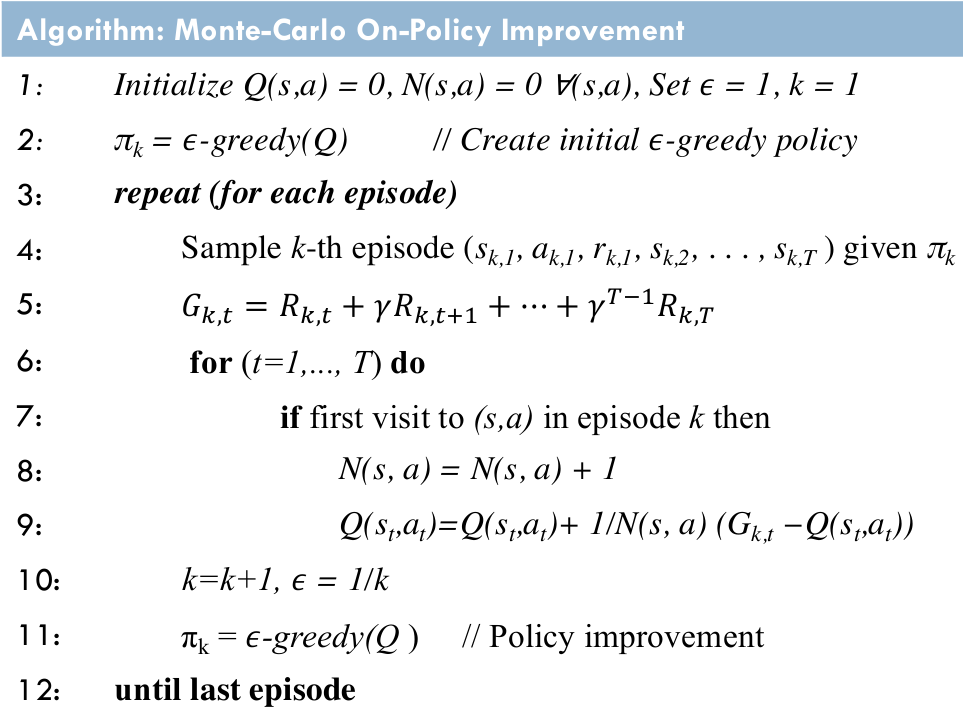


In [6]:
class MonteCarlo(Solver):
    def __init__(self, environment, discount_factor=0.99, N0=100):
        super(MonteCarlo, self).__init__(environment, discount_factor, N0)

        self.actions = list(Direction)
        
        # Q(s, a) is the value function. How good is to choose action a being at state s?
        self.Q = defaultdict(lambda: np.zeros(len(list(Direction))))

        # N(s) is the number of times that state s has been visited
        # N(s, a) is the number of times that action a has been selected from state s.
        self.N = defaultdict(lambda: np.zeros(len(list(Direction))))


    # sample of the chosen epsilon-greedy policy
    def policy(self, state):
        epsilon = self.N0 / (self.N0 + np.sum(self.N[state])*1.0)

        action = None
        if np.random.random() <= epsilon:
            action = random.choice(list(Direction))
        else:
            id = np.argmax(self.Q[state])
            action = list(Direction)[id]

        return action

    
    def learn(self, num_episodes, steps=500):

        historico = np.zeros(num_episodes)
        steps = np.zeros(num_episodes)
        wins = 0

        for t in range(num_episodes):
            
            #reset the environment
            self.environment.reset()

            #eligibility traces for monte carlo because it fits better in our problem           
            eligibility_traces = defaultdict(lambda: 1)
            episode_rewards = defaultdict(lambda: 0)

            adicionado = (None, None)
            steps_taken = 0
            while not self.environment.is_final_state():
                
                #observe the state s and action a                
                state = self.environment.state()
                action = self.policy(state)
                
                #increment  N(s, a)
                self.N[state][action.id()] += 1
                steps_taken += 1

                # add a new state-action pair to the dictionary if it's not been visited before
                if (state, action) not in eligibility_traces:
                    #save the added (state, action) pair
                    adicionado = (state, action)
                    #set the eligibility trace to one
                    eligibility_traces[(state, action)] = 1.0
        
                
                # perform the action in the environment
                # observe the reward and check if its the final state 
                _, reward = self.environment.move(action)
                done = self.environment.is_final_state()
                
                #accumulate intermediate rewards
                historico[t] += reward
                
                # update the reward for each state-action pair
                for (_state, _action) in eligibility_traces:
                    #update all (state, action) pairs except the new one
                    if (_state, action) != adicionado:
                        eligibility_traces[(_state, _action)] *= self.discount_factor
                    
                    #update the episode rewards for each (state, action) pair for further update the Q values
                    episode_rewards[(_state, _action)] += eligibility_traces[(_state, _action)] * reward
                adicionado = (None, None)
                if done:
                    wins += 1
                    break
            
            steps[t] = steps_taken
            steps_taken = 0
            
             # update the action value function using incremental mean method
            for (_state, _action) in episode_rewards:
                self.Q[_state][_action.id()] += ((episode_rewards[(_state, _action)] - self.Q[_state][_action.id()]) / self.N[_state][_action.id()])


        return historico, wins/num_episodes, steps
    

    def predict(self):
        """
            Predict the action given the learned policy 
        """
        #reset the environment
        self.environment.reset()

        for i in range(20):
            #observe the current state and get the approx. Q value
            state = self.environment.state()
            Q = self.Q[state]
            
            prox_acao = self.actions[np.argmax(Q)]

            #save an image with the current state
            self.show(str(np.around(Q, decimals=2).flatten()), i+1, prox_acao)
            
            #move to the next action
            self.environment.move(prox_acao)
            
            if self.environment.is_final_state():
                self.show("VENCEU!", i+1)
                break

#### Monte Carlo para Tabuleiro 2x2

In [8]:
mc = MonteCarlo(p, discount_factor=discount_factor, N0=N0)
tic = time.time()
historico, win_rate, steps = mc.learn( number_of_episodes, number_of_steps)
toc= time.time()
mc.predict()
text = 'Monte Carlo - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
plot_results(historico,steps,text)

#### Monte Carlo para Tabuleiro 3x2

In [ ]:
mc = MonteCarlo(p, discount_factor=discount_factor, N0=N0)
tic = time.time()
historico, win_rate, steps = mc.learn( number_of_episodes, number_of_steps)
toc= time.time()
mc.predict()
text = 'Monte Carlo - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
plot_results(historico,steps,text)

## Q-Learning 

O Q-Learning é um algoritmo de aprendizagem por reforço off-policy que busca encontrar a melhor ação a ser executada, dado o estado atual. 
É considerado off-policy porque a função q-learning aprende com ações que estão fora da política atual, como realizar ações aleatórias e, portanto,
uma política não é necessária. Mais especificamente, o Q-Learning busca aprender uma política que maximize a recompensa total.

A política ainda tem o efeito de determinar quais pares estado-ação são visitados e atualizados. No entanto, tudo o que é necessário para a convergência 
correta é que todos os pares continuem a ser atualizados. Diferente do SARSA($\lambda$), o Q-Learning toma o valor maximo para Q(S',a'), normalmente adivindo de uma segunda
política a qual quer se aprender. 

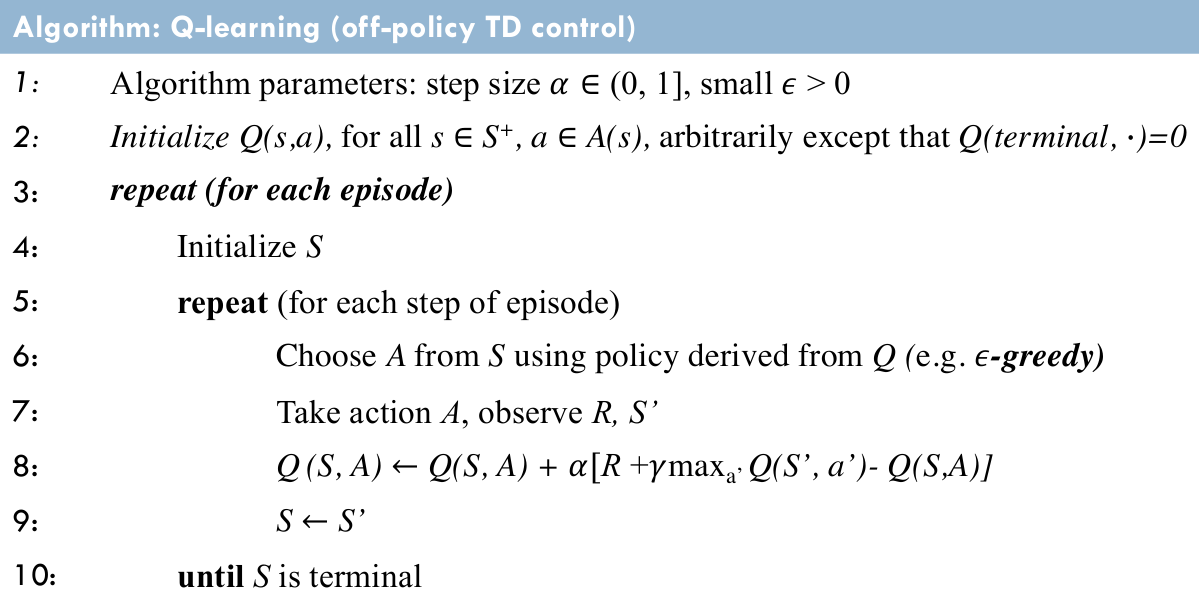

In [9]:
class QLearning(Solver):
    def __init__(self, environment, discount_factor=0.99, N0=100):
        super(QLearning, self).__init__(environment, discount_factor, N0)

        self.actions = list(Direction)
        # Q(s, a) is the value function. How good is to choose action a being at state s?
        self.Q = defaultdict(lambda: np.random.uniform(0.1,0.9,len(list(Direction))))
        self.Q[self.environment.state()] = np.zeros(len(self.environment.state()))

        # N(s) is the number of times that state s has been visited
        # N(s, a) is the number of times that action a has been selected from state s.
        self.N = defaultdict(lambda: np.zeros(len(list(Direction))))

    def policy(self, state):
        epsilon = self.N0 / (self.N0 + np.sum(self.N[state])*1.0)

        action = None
        if np.random.random() <= epsilon:
            action = random.choice(list(Direction))
        else:
            id = np.argmax(self.Q[state])
            action = list(Direction)[id]
        
        self.N[state][action.id()] += 1

        return action

    def learn(self, episodes, steps=1000):
        historico = np.zeros(steps)
        wins = 0
        acoes = np.zeros(episodes)

        for t in range(steps):

            self.environment.reset()
            state = self.environment.state()
            acc = 0
            for i in range(steps):
                # Choose A from S using policy derived from Q (e.g. ε-greedy)
                action = self.policy(state)
                _, reward = self.environment.move(action)
                acc += 1
                done = self.environment.is_final_state()
                # done = self.environment.loss
                historico[t] += reward
                acoes[t] = acc
    
                # Take action A, observe R, S’
                new_state = self.environment.state()
                id = np.argmax(self.Q[state])
                next_action = list(Direction)[id]
                
                #calculate the alpha value 
                alpha = 1.0 / (self.N[state][action.id()])
                
                # Q (S, A) ← Q(S, A) + α[R +γmax a’ Q(S’, a’)- Q(S,A)]
                self.Q[state][action.id()] += alpha * (reward + self.discount_factor * self.Q[new_state][next_action.id()] - self.Q[state][action.id()])

                state = new_state

                if done:
                    wins += 1
                    break
                    
            state = new_state
            current_action = next_action
        
        return historico, wins/episodes, acoes
    
    def predict(self):
        """
            Predict the action given the learned policy 
        """
        #reset the environment
        self.environment.reset()

        for i in range(20):
            #observe the current state and get the approx. Q value
            state = self.environment.state()
            Q = self.Q[state]
            
            prox_acao = self.actions[np.argmax(Q)]

            #save an image with the current state
            self.show(str(np.around(Q, decimals=2).flatten()), i+1, prox_acao)
            
            #move to the next action
            self.environment.move(prox_acao)
            
            if self.environment.is_final_state():
                self.show("VENCEU!", i+1)
                break

#### Q-Learning para Tabuleiro 2x2 

In [10]:
p = NPuzzle(2, 2, terminal_state_reward=1000, invalid_position_reward=-5, step_reward=-1)
ql = QLearning(p, discount_factor=discount_factor, N0=N0)
tic = time.time()
historico, win_rate, steps = ql.learn(number_of_episodes, number_of_steps)
toc= time.time()
ql.predict()
text = 'Q-Learning - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
plot_results(historico,steps,text)

#### Q-learning para Tabuleiro 3x2

In [11]:
p = NPuzzle(3, 2, terminal_state_reward=1000, invalid_position_reward=-5, step_reward=-1)
ql = QLearning(p, discount_factor=discount_factor, N0=N0)
tic = time.time()
historico, win_rate, steps = ql.learn(number_of_episodes, number_of_steps)
toc= time.time()
ql.predict()
text = 'Q-Learning - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
plot_results(historico,steps,text)

## SARSA($\lambda$)

Sarsa é um outro algoritmo para realizar a etapa de controle. Para o controle utilizando Monte Carlo, os valores de Q são atualizados apenas ao fim do episódio, isto não é verdade para o Sarsa, onde a atualização dos valores dos estados pode ser feita de maneira on-line.

Para fazer isso, em vez de atualizar nossa função de valor de acordo com o futuro (retorno G), atualizamos com base no próximo estado e em um traço de elegibilidade. A idéia é que o traço de elegibilidade mantenha o registro de quantas vezes estivemos em um estado e há quanto tempo estivemos nesse estado. A idéia do Sarsa($\lambda $) é aplicar o método de previsão TD($\lambda $) aos pares de (estado ação) em vez de apenas os estados. Obviamente, então, precisamos de um traço não apenas para cada estado, mas para cada par de ação-estado. Neste caso optamos por implementar o backward view. 

A cada passo do algortimo precisa-se avaliar o TD-Error atual e ao que foi atribuído anteriormente para cada estado de acordo com o traço de elegibilidade do estado naquele momento. Para entender melhor o conceito de backward view, podemos considerar o comportamento de acordo com os diversos  valores de $\lambda $ no algoritmo abaixo. Se todos os traços são zero, exceto o traço correspondente ao (estado, action) atual . Assim, a atualização TD($\lambda $) se reduz simplesmente ao TD(0).  TD(0) é o caso em que apenas o estado anterior ao atual é alterado pelo erro TD. Para valores maiores de $\lambda $, mas ainda assim < 1, mais dos estados anteriores são alterados, mas cada estado mais distante temporalmente são menos alterados por conta  que o traço de elegibilidade é menor. É importante notar que se $\lambda$ = 1, então o reforço recebido pelos estados se reduz apenas ao valor de $\gamma$ por passo. Assim como estudado nas aulas anteriores, este éé o  comportamento de Monte Carlo. 

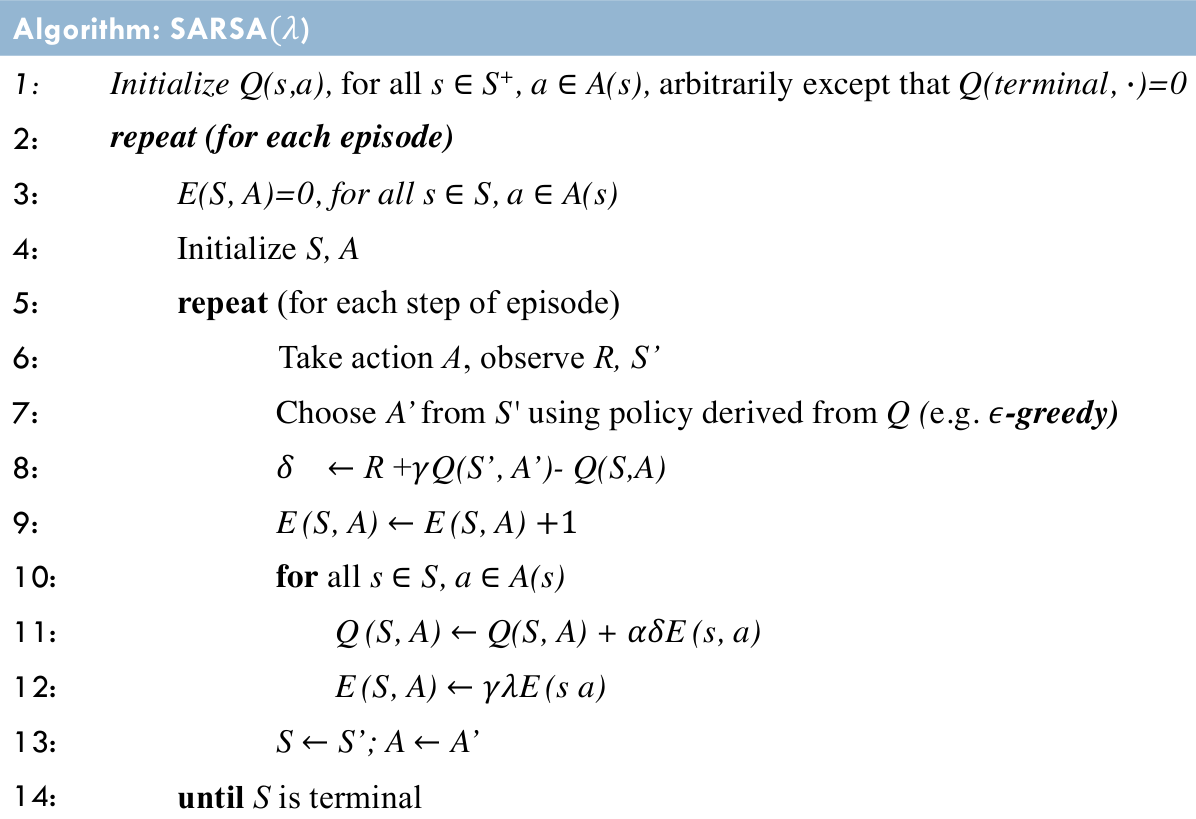

In [13]:
class SarsaLambda(Solver):
    def __init__(self, environment, discount_factor=0.99, N0=100, lamda_factor=1,
                 eligibility_decay=0.90):
        super(SarsaLambda, self).__init__(environment, discount_factor, N0)

        self.actions = list(Direction)
        
        # Q(s, a) is the value function. How good is to choose action a being at state s?
        self.Q = defaultdict(lambda: np.random.uniform(0.1,0.9,len(list(Direction))))
        self.Q[self.environment.state()] = np.zeros(len(self.actions))

        # Eligibility Trace
        self.E = defaultdict(lambda: np.zeros(len(list(Direction))))
    
        # N(s) is the number of times that state s has been visited
        # N(s, a) is the number of times that action a has been selected from state s.
        self.N = defaultdict(lambda: np.zeros(len(list(Direction))))

        #lambda factor for eligibility trace
        self.lamda_factor=lamda_factor
        
        # eligibility decay in eligibility trace
        self.eligibility_decay=eligibility_decay

    def policy(self, state):
        '''
            returns an action following the epsilon greedy exploration 

            Arguments:
                state (tuple): state encoded into a tuple
            
            Returns:
                action (Direction): the action to be taken
        '''
        # epsilon calculation given the N0 and the number of times that state s has been visited
        epsilon = self.N0 / (self.N0 + np.sum(self.N[state])*1.0)

        action = None
        if np.random.random() <= epsilon:
            action = random.choice(list(Direction))
        else:
            id = np.argmax(self.Q[state])
            action = list(Direction)[id]
        
        # increment the (state, action) counter
        self.N[state][action.id()] += 1

        return action

    def learn(self, episodes, steps):
        #store the cummulative reward and the number of actions taken
        history = np.zeros(episodes)
        num_actions = np.zeros(episodes)

        actions_taken = 0
        #number of times the agent has won in the episode
        wins = 0
        for t in range(episodes):
            
            #reset the elegibility trace
            self.E = defaultdict(lambda: np.zeros(len(list(Direction))))

            #reset the environment
            self.environment.reset()
            
            #get the current state 
            state = self.environment.state()

            #get current action given the state following epsilon greedy exploration
            current_action = self.policy(state)
            next_action = current_action

            for _ in range(steps):
                # obserse Q(s, a)
                q = self.Q[state][current_action.id()]

                #get the reward for perfoming the current action
                _, reward = self.environment.move(current_action)
                
                # get if it is final state
                done = self.environment.is_final_state()
                
                #accumulate the reward and count how many action has been performed
                history[t] += reward
                actions_taken += 1
                
                # observe the action a' and state s'
                new_state = self.environment.state()
                next_action = self.policy(new_state)
                
                #get Q(s', a')
                q_next = self.Q[new_state][next_action.id()]
                
                #calculate the delta value based if the current state is terminal 
                if not done:
                    delta = reward + q_next*self.lamda_factor - q
                else:
                    delta = reward - q * self.lamda_factor
                
                # increment the eligibility trace 
                self.E[state][current_action.id()] += 1
    
                #calculate the alpha value
                alpha = 1.0 / (self.N[state][current_action.id()])
                
                #iterate over all visited states
                for s, _ in self.Q.items():
                    self.Q[s][:] += alpha * delta * self.E[s][:]
                    self.E[s] *= (self.discount_factor * self.eligibility_decay)

                #check if the agent has reached the final state
                if done:
                    wins += 1
                    break

                #update the current state and action with the new ones 
                state = self.environment.state()
                current_action = next_action
            
            num_actions[t] = actions_taken
            actions_taken = 0
        
        return history, wins/episodes, num_actions
    
    def predict(self):
        """
            Predict the action given the learned policy 
        """
        #reset the environment
        self.environment.reset()

        for i in range(20):
            #observe the current state and get the approx. Q value
            state = self.environment.state()
            Q = self.Q[state]
            
            prox_acao = self.actions[np.argmax(Q)]

            #save an image with the current state
            self.show(str(np.around(Q, decimals=2).flatten()), i+1, prox_acao)
            
            #move to the next action
            self.environment.move(prox_acao)
            
            if self.environment.is_final_state():
                self.show("VENCEU!", i+1)
                break

In [15]:
p = NPuzzle(2, 2, terminal_state_reward, invalid_position_reward, step_reward)
sarsalamb = SarsaLambda(p, discount_factor=discount_factor, N0=N0, lamda_factor=lamda_factor)
tic = time.time()
historico, win_rate, steps = sarsalamb.learn(number_of_episodes, number_of_steps)
toc= time.time()
sarsalamb.predict()
text = 'Sarsa(λ) - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
plot_results(historico,steps,text)

###  Sarsa ($\lambda$) para tabuleiros 3 x 2 

In [16]:
p = NPuzzle(3, 2, terminal_state_reward, invalid_position_reward, step_reward)
sarsalamb = SarsaLambda(p, discount_factor=discount_factor, N0=N0, lamda_factor=lamda_factor)
tic = time.time()
historico, win_rate, steps = sarsalamb.learn(number_of_episodes, number_of_steps)
toc= time.time()
sarsalamb.predict()
text = 'Sarsa(λ) - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
plot_results(historico,steps,text)

## Q-Learning - Linear Approximation

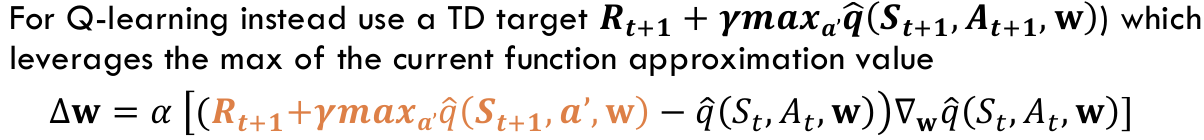

In [17]:
class QLearningApproxi(Solver):
    def __init__(self, environment, discount_factor=0.99, N0=100, lamda_factor=1,
                 eligibility_decay=0.90, step_size=0.5):
        super(QLearningApproxi, self).__init__(environment, discount_factor, N0)

        #store all possible action
        self.actions = list(Direction)
        self.W = np.random.rand(len(self.actions), (self.environment.width*self.environment.height)**2)
    
        # N(s) is the number of times that state s has been visited
        # N(s, a) is the number of times that action a has been selected from state s.
        self.N = defaultdict(lambda: np.zeros(len(list(Direction))))

        # Define lambda factor and step size
        self.lamda_factor=lamda_factor
        self.step_size=step_size

    def policy(self, state):
        '''
            returns an action following the epsilon greedy exploration 

            Arguments:
                state (tuple): state encoded into a tuple
            
            Returns:
                action (Direction): the action to be taken
        '''
        # calculates the value epsilon
        epsilon = self.N0 / (self.N0 + np.sum(self.N[state])*1.0)

        # get the approx. Q values for that state
        Q = np.array([self.get_q_value(state, action) for action in self.actions])

        # checks the new action, random or max to state
        action = None
        if np.random.random() <= epsilon:
            action = random.choice(list(Direction))
        else:
            id = np.argmax(Q)
            action = list(Direction)[id]

        #accumulate the (state, action) ṕair
        self.N[state][action.id()] += 1
        
        #return the action
        return action
    
    def get_state_features(self, state):
        '''
        returns the binary representation of the state. For example:

        state: (0, 1, 2, 3) ->  [1 0 0 0],
                                [0 1 0 0],
                                [0 0 1 0],
                                [0 0 0 1],


        Arguments:
            state (tuple): state encoded into a tuple

        Returns:
            onehot (numpy.array): binary feature representation of the state
        '''
        state = np.array(state)
        size = len(state)
        onehot = np.zeros((size, size))
        positions = np.tile(np.arange(size), size).reshape(size, size) == state.reshape(-1, 1)
        onehot[positions] = 1
        onehot = onehot.flatten()
        return onehot

    def get_q_value(self, state, action):
        '''
            returns the lienar approximation of the q value

            Arguments:
                state (tuple): state encoded into a tuple
            
            Returns:
                Q (numpy.array or int): the approx. Q value for the (state, action) pair
        '''
        features = self.get_state_features(state)
        return np.sum(features * self.W[action.id()])

    def learn(self, episodes=1000, num_steps=1000):
        historico = np.zeros(episodes)
        acoes = np.zeros(episodes)
        wins = 0
        for t in range(episodes):

            self.environment.reset()
            state = self.environment.state()
            current_action = self.policy(state)
            acc = 0
            for _ in range(num_steps):
                reward = 0
                q_old = self.get_q_value(state, current_action)
                _, reward = self.environment.move(current_action)
                acc += 1
                done = self.environment.is_final_state()
                historico[t] += reward
                acoes[t] = acc

                new_state = self.environment.state()
                next_action = self.policy(new_state)
                q_next = self.get_q_value(new_state, next_action)
                next_action_max = self.policy(new_state)
                q_next_max = self.get_q_value(new_state, next_action)
                
                if not done:
                    delta = self.step_size*(reward + self.discount_factor*q_next_max - q_old)
                else:
                    delta = self.step_size*(reward - q_old)
                
                #calculate the alpha value 
                alpha = 1.0 / (self.N[state][current_action.id()])

                gradient = self.get_state_features(state)
                self.W[current_action.id()] += alpha * delta * gradient

                if done:
                    wins += 1
                    break

                state = new_state
                current_action = next_action
        
        return historico, wins/episodes, acoes
    
    def predict(self):
        """
            Predict the action given the learned policy 
        """
        #reset the environment
        self.environment.reset()

        for i in range(20):
            #observe the current state and get the approx. Q value
            state = self.environment.state()
            Q = np.array([self.get_q_value(state, action) for action in self.actions])

            prox_acao = self.actions[np.argmax(Q)]

            #save an image with the current state
            self.show(str(np.around(Q, decimals=2).flatten()), i+1, prox_acao)
            
            #move to the next action
            self.environment.move(prox_acao)
            
            if self.environment.is_final_state():
                self.show("VENCEU!", i+1)
                break

In [21]:
p = NPuzzle(2, 2, terminal_state_reward=terminal_state_reward, invalid_position_reward=invalid_position_reward, step_reward=step_reward)
QLearningAp = QLearningApproxi(p, discount_factor=discount_factor, N0=N0,lamda_factor=lamda_factor)
tic = time.time()
historico, win_rate, steps = QLearningAp.learn(number_of_episodes, number_of_steps)
toc= time.time()
QLearningAp.predict()
text = 'Q-Learning Approximator - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
plot_results(historico,steps,text)

In [34]:
step_size = 0.3
p = NPuzzle(3, 2, terminal_state_reward=1000, invalid_position_reward=-5, step_reward=-1)
QLearningAp = QLearningApproxi(p, discount_factor=discount_factor, N0=N0,lamda_factor=lamda_factor, step_size=step_size)
tic = time.time()
historico, win_rate, steps = QLearningAp.learn(number_of_episodes, number_of_steps)
toc= time.time()
QLearningAp.predict()
text = 'Q-Learning Approximator - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
plot_results(historico,steps,text)

## Sarsa ($\lambda$) - Linear Approximation

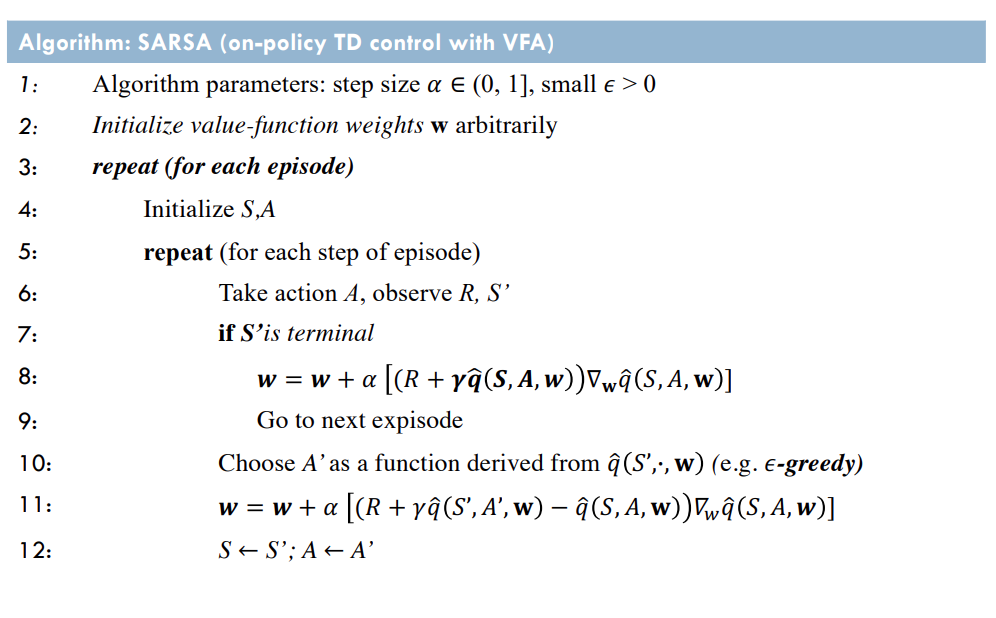

In [23]:
class SarsaLambdaApprox(Solver):
    def __init__(self, environment, discount_factor=0.99, N0=100, lamda_factor=1,
                 eligibility_decay=0.90, step_size=0.5):
        super(SarsaLambdaApprox, self).__init__(environment, discount_factor, N0)

        #store all possible action
        self.actions = list(Direction)

        #calculate the state dimension
        self.state_dimension = (self.environment.width*self.environment.height)**2

        self.W = np.random.rand(len(self.actions), self.state_dimension)

        # Eligibility Trace
        self.E = np.zeros((len(self.actions), self.state_dimension))
    
        # N(s) is the number of times that state s has been visited
        # N(s, a) is the number of times that action a has been selected from state s.
        self.N = defaultdict(lambda: np.zeros(len(list(Direction))))

        #Parameters for sarsa lambda algorithm
        self.lamda_factor=lamda_factor
        self.eligibility_decay=eligibility_decay
        self.step_size=step_size

    def policy(self, state):
        '''
            returns an action following the epsilon greedy exploration 

            Arguments:
                state (tuple): state encoded into a tuple
            
            Returns:
                action (Direction): the action to be taken
        '''
        epsilon = self.N0 / (self.N0 + np.sum(self.N[state])*1.0)

        #get the approx. Q values for that state
        Q = self.get_q_value(state)

        action = None
        if np.random.random() <= epsilon:
            action = random.choice(list(Direction))
        else:
            id = np.argmax(Q)
            action = list(Direction)[id]
        
        # accumulate 
        self.N[state][action.id()] += 1

        return action
    
    def get_state_features(self, state):
        '''
            returns the binary representation of the state. For example:

            state: (0, 1, 2, 3) ->  [1 0 0 0],
                                    [0 1 0 0],
                                    [0 0 1 0],
                                    [0 0 0 1],
            

            Arguments:
                state (tuple): state encoded into a tuple
            
            Returns:
                onehot (numpy.array): binary feature representation of the state
        '''
        #transform tuple into array
        state = np.array(state)
        size = len(state)
        
        #create zero matrix
        onehot = np.zeros((size, size))
        
        #mark the positions to set as 1
        positions = np.tile(np.arange(size), size).reshape(size, size) == state.reshape(-1, 1)
        
        #mark those positions
        onehot[positions] = 1
        
        return onehot.flatten()

    def get_q_value(self, state, action=None):
        '''
            returns the lienar approximation of the q value

            Arguments:
                state (tuple): state encoded into a tuple
            
            Returns:
                Q (numpy.array or int): the approx. Q value for the (state, action) pair
        '''
        #get feature representation of the state
        features = self.get_state_features(state)

        #Q.shape = (4, 1) -> Approx. Q value for each possible action
        Q = np.dot(self.W, features.reshape(-1, 1))  
        assert Q.shape == (len(self.actions), 1)
        
        #return the value for that specific action otherwise for all actions 
        return Q[action.id()] if action else Q


    def update_eligibilty(self, state, action):
        '''
            helper to update the eligibility trace

            Arguments:
                state, action (tuple, Direction): state-action pair
            
            Returns:
                None
        '''
        #zero matrix 
        b = np.zeros((len(self.actions), self.state_dimension))
        
        #get linear approx. of q values
        q_values = self.get_state_features(state).reshape(1, -1)
        
        #store the q values into the b matrix
        b[action.id()] = q_values

        #update eligibility traces 
        self.E = self.eligibility_decay * self.lamda_factor * self.E + b


    def learn(self, episodes=1000, num_steps=1000):
        #store the accumulated reward and steps taken 
        historico = np.zeros(episodes)
        acoes = np.zeros(episodes)
        wins = 0
        
        for t in range(episodes):
            
            #reset the elegibility trace
            self.E = np.zeros((len(self.actions), self.state_dimension))

            #reset the environment and the current state
            self.environment.reset()
            state = self.environment.state()
            current_action = self.policy(state)
            
            #steps counter 
            steps = 0
            for _ in range(num_steps):
                #store the current q value and abserve the reward
                q_old = self.get_q_value(state, current_action)
                _, reward = self.environment.move(current_action)
                steps += 1

                #store if it the final state
                done = self.environment.is_final_state()
                
                #accumulate the reward
                historico[t] += reward

                #update_the eligibilty matrix             
                self.update_eligibilty(state, current_action)
                
                #observe the action a' and state s'
                new_state = self.environment.state()
                next_action = self.policy(new_state)
                q_next = self.get_q_value(new_state, next_action)
                
                #calculate the td error
                if not done:
                    delta = self.step_size*(reward + self.discount_factor*q_next - q_old)
                else:
                    delta = self.step_size*(reward - q_old)
                
                #calculate the alpha value 
                alpha = 1.0 / (self.N[state][current_action.id()])

                #update the weight matrix
                self.W += alpha * delta * self.E
            
                #check if the agent has reached the final state
                if done:
                    wins += 1
                    break

                #update the current state and action    
                state = new_state
                current_action = next_action
            
            acoes[t] = steps
            steps = 0
        
        return historico, wins/episodes, acoes
    
    def predict(self):
        """
            Predict the action given the learned policy 
        """
        
        #reset the environment
        self.environment.reset()

        for i in range(20):
            #observe the current state and get the approx. Q value
            state = self.environment.state()
            Q = self.get_q_value(state)

            #get the next action
            prox_acao = self.actions[np.argmax(Q)]

            #save an image with the current state
            self.show(str(np.around(Q, decimals=2).flatten()), i+1, prox_acao)
            
            #move to the next action
            self.environment.move(prox_acao)
            
            if self.environment.is_final_state():
                self.show("VENCEU!", i+1)
                break

In [24]:
p = NPuzzle(2, 2, terminal_state_reward, invalid_position_reward, step_reward)
SarsaLambdaAp = SarsaLambdaApprox(p, discount_factor=discount_factor, N0=N0,lamda_factor=lamda_factor)
tic = time.time()
historico, win_rate, steps = SarsaLambdaAp.learn(number_of_episodes, number_of_steps)
toc= time.time()
SarsaLambdaAp.predict()
text = 'Sarsa(λ) Approximator - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
plot_results(historico,steps,text)

In [25]:
step_size = 0.3
p = NPuzzle(3, 2, terminal_state_reward, invalid_position_reward, step_reward)
SarsaLambdaAp = SarsaLambdaApprox(p, discount_factor=discount_factor, N0=N0,lamda_factor=lamda_factor, step_size=step_size)
tic = time.time()
historico, win_rate, steps = SarsaLambdaAp.learn(number_of_episodes, number_of_steps)
toc= time.time()
SarsaLambdaAp.predict()
text = 'Sarsa(λ) Approximator - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
plot_results(historico,steps,text)

# 3 - Avaliação e Discussões

## Vantagens e Desvantagens do Uso de Bootstrapping

As vantagens de se utilizar métodos que realizem boostrapping são inúmeras para o nosso problema. Primeiramente, em tabuleiros maiores, 
é possível que em alguns métodos não consigam fazer a exploração necessária e adequada de todos os estados possíveis e, com isso, os valores de Q 
não sejam atualizados, ocasionando escolhas de ações aleatórias em estados que não são conhecidos. Bootstraping permite que agora tenhamos uma estimativa 
para todos os estados possíveis do problemas, bastando apenas ter em posse uma matriz de pesos que é atualizada de acordo com os rewards obtidos. 
Infelizmente, os resultados obtidos não foram de acordo com a nossa expectativa visto que para tabuleiros maiores sua perfomance continuam de maneira semelhante
aos métodos tradicionais. Porém para em relação ao tempo de execução, têm-se uma boa vantagem através deste método, com tempos iguais ou inferiores. 
Para tabuleiros 2x2 apresentou-se uma grande vantagem para obtenção dos resultados, visto que anteriormente seria necessário verificar todo o caminho para atualizar 
os valores dos estados, através do método de boostrapping têm-se as estimativas que facilitam o resultado final.

## Influência da Função de Recompensa nos Resultados

As recompensas definidas para o modelo influenciam diretamente da sua capacidade de decidir quais as as mehores ações e as piores para cada estado.
Recompensas positivas estimulam o modelo a manter-se no estado, enquanto que recompensas negativas afastam do estado. Este comportamento deve-se a política de atualização
de estados que propagam os valores de recompensas e ajustam a tabela de estados, para algoritmos que não utilização aproximadores de função ou a função de aproximação, para
os que utilizam esta técnica.

Através das recompensas definidas para este problema, conseguiu-se alcançar valores de até 100% de vitória para ambientes 2x2, 2x3 e 3x2. Para ambientes maiores, acima 
de áreas 3x3, devido as limitações das plataformas utilizadas e tempo necessário para treinamento dos modelos, tem-se resultados de 91% de vitórias. Neste algoritmos tem-se
tempos de treinamentos entre  alguns segundos (10s) para campos 2x2 e até 4 horas para campos 3x3 com limitações de episódios e passos.

## Influência do Aproximador de Função Linear nos Resultados

Com a utilização de aproximadores de funções tem-se a possibilidade de realizar a busca sem a necessidade do armazenamento das matrizes de estados, desta forma
a solução do problema é aproximado por uma função linear parametrizada pelos pesos obtidos no ambiente observado. 

Para este problema os estados foram codificados através de uma representação hot enconding:

Por exemplo, o estado (0, 1, 2, 3) será traduzido seguinte codificação: $[1 0 0 0], [0 1 0 0], [0 0 1 0], [0 0 0 1]$, onde é gerado um vetor one-hot encoding para 
cada posição do tabuleiro de acordo com a sua posição. Por fim, todas os vetores são concatenados para gerar a representação final do estado. Para o exemplo anterior, 
o estado final será: $[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]$    

Verificou-se que para cenários menores (2x2) os resultados obtidos foram competitivos com os métodos que não utilizam aproximação e em alguns cenários têm um tempo menor,
além de realizar menos ações ao longo dos episódios. Porém para cenários maiores (3x2, 3x3) os resultados foram insatisfatórios. 
Acredita-se que este mau resultado seja devido a escolha do feacture vector adotado, que fornece uma melhor discretização do problema porém não apresenta uma boa representação
do jogo. Também deve-se ressaltar que o aproximador utilizado foi uma combinação linear e que para outros aproximadores melhores resultados poderiam ser atingidos.

## Influência dos Múltiplos Valores entre Variáveis

### Comparação entre diferentes valores para N0

In [26]:
# Realiza o Sarsa Lambda para múltiplos valores de N0
for N0 in range(5, 100, 5):
    sarsalamb = SarsaLambda(p, discount_factor=discount_factor, N0=N0, lamda_factor=lamda_factor)
    tic = time.time()
    historico, win_rate, steps = sarsalamb.learn(number_of_episodes, number_of_steps)
    toc= time.time()
    text = 'Sarsa(λ) - N0: '+ str(N0) +' - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
    plot_results(historico,steps,text)

Dado  $$\varepsilon_t = N 0/(N 0+N (s_t))$$, sendo N0 uma constante e N(s) o número de vezes que um dado estado foi visitado, observou-se as múltiplas 
possibilidade de utilização desta variável e qual seu impacto nos algoritmos de aprendizado. Através da formula, observa-se que quanto maior o número 
de visitas em um determinado estado, menor será o valor de $$\varepsilon_t$$ o que indica que os valores selecionados em uma ação têm uma menor chance de seleções 
aleatórias, desta forma, inicialmente têm-se altos valores de explorações aleatórias (exploration) e após algunas iterações uma maior chance de exploração do 
resultados já encontrados como melhores (exploitation).

Uma vez que o valor de $$\varepsilon_t$$ será utilizado como comparativo de valores aleatórios, para baixos valores de N0 têm-se uma maior 
probabilidade de exploração (exploration), seguindo a tendência explicada anteriormente. Para valores iniciais de $$\varepsilon_t$$ altos, há uma menor chance 
de exploração inicial, tendendo a utilizar-se mais do mecanismo de exploitation que de exploration.

Este comportamento pode ser observado nos gráficos anteriores, onde para baixos valores de N0, onde tende-se a existir mais explorações iniciais, os valores das 
próximas iterações são mais estáveis, quanto que para maiores valores de N0, uma maior instabilidade do método visto que ele tende a realizar mais exploitation, 
desta forma muitas vezes ficando em um valor ótimo local.

### Comparação entre diferentes valores para $$ \lambda $$ Factor

In [33]:
#Variação do lambda_factor entre 0.3 e 9.0 .
for l in range(3, 10):
    N0=55
    lamda_factor=l/10.0
    
    sarsalamb = SarsaLambda(p, discount_factor=discount_factor, N0=N0, lamda_factor=lamda_factor)
    tic = time.time()
    historico, win_rate, steps = sarsalamb.learn(number_of_episodes, number_of_steps)
    toc= time.time()
    text = 'Sarsa(λ) - Fator λ: '+ str(lamda_factor) +' - Win Rate: ' + str(win_rate) + ' - Tempo de execução: ' + str("{:.2f}".format(toc-tic) + ' seg')
    plot_results(historico,steps,text)

Neste trabalho também analisou-se o impacto da variável $$\lambda$$ Factor no modelo SARSA($$\lambda$$). Para isto variou-se este parâmetro por múltiplos valores, entre 0.1 e 1.0.
Observa-se que este parâmetro representa a quantidade de amostragens futuras que serão utilizadas para calcular-se o novo valor de estado, como observado abaixo, onde cada coluna é um dado n-step Sarsa, e $$1-\lambda, (1-\lambda) \lambda$$ seus pesos:

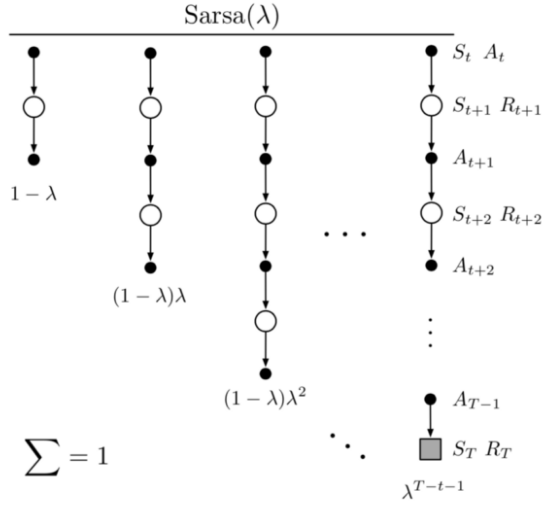

Dada a variação de valores de $$\lambda$$, tem-se que com $$\lambda$$(0) este algoritmo aproxima-se do comportamendo to TD(0) onde apenas uma nova ação é observada
a frente para estimar o valor final, oara valores de $$\lambda$$ máximo o algoritmo realiza uma amostragem completa em um episódio. Desta forma este algoritmo aproveita 
as qualidades de cada método, de acordo com o valor utilizado. Para valores baixos, têm-se a utilização de bootstrapping, tendo assim uma baixa variância, quanto que 
para valores altos, têm-se uma alta variância porém realiza o aprendizado apenas para sequências completas.

Pode-se observar através dos resultados coletados que baixos valores de $$\lambda$$ os resultados de win rate são baixos, acredita-se por causa da pequena quantidade
de amostras obteve-se uma má estivativa da hipótese. Para valores mais altos de $$\lambda$$ mais exemplos são coletados, melhorando a estivativa. 

## Discussão dos Resultados Finais

Para escolher o melhor método para o problema em questão, decidimos levar em consideração dois pontos principais: a estabilidade de obtenção dos rewards 
(e chegando ao estado final) e a estabilidade da quantidade de passos efetuados para terminar o episódio. O primeiro ponto pode ser avaliado através do valor 
armazenado na variável *win rate* mostrada nos gráficos de cada experimento.

Fixando o número de episódios e número de passos em 1000, para tabuileiros 2x2, todo os resultados obtidos obtiveram pelo menos uma taxa de 99% de *win rate*. 
Isso, de certa forma, é um resultado esperado devido à baixa quantidade de estados do problema. Relembrando, para tabuleiro 2x2 e com a representação de estados 
utilizada, têm-se um total de 4! = 24 estados possíveis.

Para tabuleiros 3x2, obtivemos resultados acima de 90% de *win rate* no método Q-Learning, para passos e episódios em 1000. Outros métodos, como o SARSA($\lambda$) 
apresentou valores acima de 70%. Já para tabuleiro de tamanho 3x2, temos 6! = 720 estados possíveis. Apesar do Q-Learning sobrestimar os reforços, o que pode 
dificultar a convergência do método, difenrente do método SARSA, ao estimar o valor de Q(S',a'), ou seja a ação futura para um determinado estado, o algoritmo seleciona,
a ação que maximiza o valor resultante, sem necessáriamente realizar o passo de exploração.

Contudo, para tabuleiros 3x3, devido ao grande número de estados possíveis de acordo com as combinações possíveis do problema (3x3 = 9! = 362880 estados possíveis) 
tornou inviável a execução de diversos métodos e sua avaliação. Principalmente métodos como Sarsa($\lambda$) e Monte Carlo que possuem um custo computacional elevado, este número 
de estados torna a execução entremamente lenta e suceptível a overflow númericos (isso acontece com certa frequencia nos métodos que utilizam aproximadores em tabuleiros 3x2 e 3x3). Para 
tentar evitar o overflow numérico, nossa solução foi adicionar um parâmetro extra chamado *step_size* (com valor < 1) que controla a taxa de atualização dos pesos para a função de aproximação. 
Apesar da introdução deste fator, a convergência do método sofreu bastante em muitos casos, mas foi uma das maneiras que encontramos para evitar o overflow. 
 
Como demonstração de um método para o cenário 3x3, utilizou-se o algoritmo Q-Learning devido seu bom resultado e tempo demonstrado anteriormente. No caso abaixo o modelo
passou 4 horas em treinamento, com 50.000 episódios. Observa-se um valor de *win rate* de 91,8%.
A equipe também executou este exemplo para mais episódios, porém devido a grande quantidade de epśodios, com poucos aumentos o tempo necessário para finalizar o algoritmo
passava do tempo disponibilizado pelas plataformas em núvem utilizadas para o trabalho.


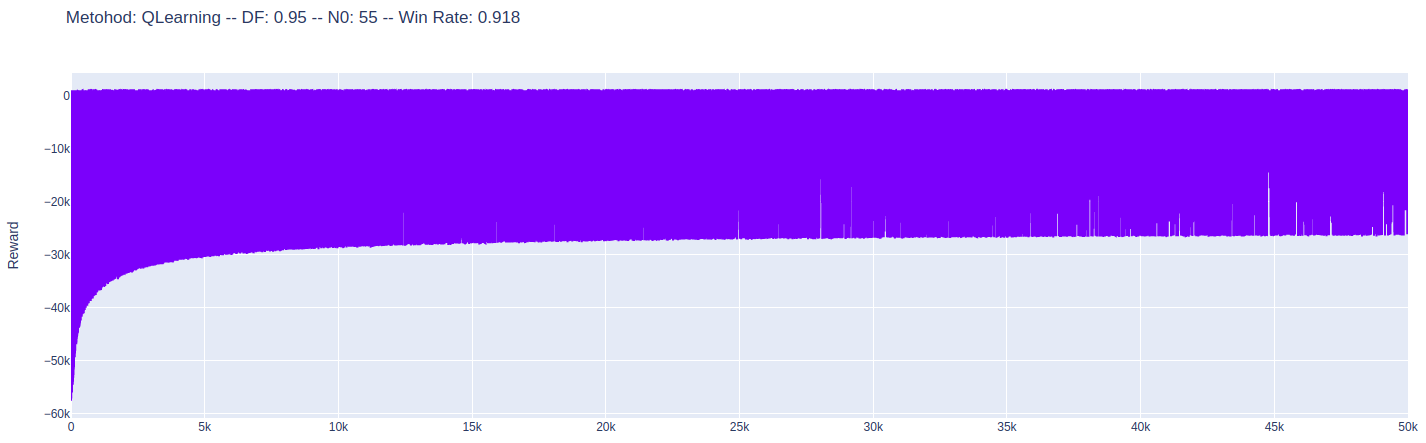

# 4 - Contribuições

- Levy: Sarsa-Lambda, Sarsa-Lambda VFA, Monte Carlo Control, Relatório e Video.
- Diego: Q-Learning, Q-Learning VFA, Relatório.
- Leonardo: Modelagem do problema, Implementação do ambiente, Relatório e Vídeo.
- Luara: 
- Matteo: Relatório.

# 5 - Vídeo de Apresentação

https://www.youtube.com/watch?v=EGIRHfG81bY

# 6 - Referências

https://8-puzzle.readthedocs.io

https://sumitg.com/assets/n-puzzle.pdf

https://www.aaai.org/Papers/AAAI/1986/AAAI86-027.pdf

## Observações

Se houver algum problema ao visualizar gráficos e outros figuras, favor acessar o link do projeto: 

https://deepnote.com/project/9b4f99fb-5d29-45e8-a747-2be084779243#%2Fnotebook.ipynb